<a href="https://colab.research.google.com/github/Schollera/MAT421/blob/main/MAT421_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sohan Chollera

MAT421 HW#5

Due Date: 2/15/2025

Example One:

An eingenvector is a non-zero vector that only scales by a constant factor, given a square matrix A. An eingenvalue is a scalar representing the factor by which the eingenvector is scaled.

In [18]:
import numpy as np
#Define square matrix
A = np.array([[4, -2],
              [1, 1]])
#Compute eingenvalues and eingenvectors
eingenvalues, eingenvectors = np.linalg.eig(A)
#Verify if equation holds
for i in range(len(eingenvalues)):
  lambda_ = eingenvalues[i]
  v = eingenvectors[:, i]
#Checking if A*v = lambda*v
  lefthandside = np.dot(A, v)
  righthandside = lambda_ * v
  print(f"Eingenvalue {lambda_}:")
  print(f"A * v = {lefthandside}")
  print(f"lambda * v = {righthandside}")
  print(f"Difference: {np.allclose(lefthandside, righthandside)}\n")

Eingenvalue 3.0:
A * v = [2.68328157 1.34164079]
lambda * v = [2.68328157 1.34164079]
Difference: True

Eingenvalue 2.0:
A * v = [1.41421356 1.41421356]
lambda * v = [1.41421356 1.41421356]
Difference: True



Example Two:

Singular value decomposition is a matrix factorization method to decompose an m by n matrix into three matrices, U, S, and V^T. The multiplication of these three individual matrices will yield the original matrix A.

In [19]:
import numpy as np
#Define square matrix
A = np.array([[1, 10, 33],
              [43, 51, 44],
              [711, 84, 93]])
#Perform SVD
U, S, VT = np.linalg.svd(A)
#Reconstruct A from U, S, and VT
S_matrix = np.zeros_like(A, dtype=float)
for i in range(len(S)):
  S_matrix[i, i] = S[i]
A_reconstructed = np.dot(U, np.dot(S_matrix, VT))
#Check accuracy of reconstructed matrix
print(f"Original A:\n{A}")
print(f"Reconstructed A: \n{A_reconstructed}")
print(f"Difference: {np.allclose(A, A_reconstructed)}")
#Verify U and VT are orthogonal
print(f"U * U^T = \n{np.dot(U, U.T)}")
print(f"VT * VT^T = \n{np.dot(VT, VT.T)}")

Original A:
[[  1  10  33]
 [ 43  51  44]
 [711  84  93]]
Reconstructed A: 
[[  1.  10.  33.]
 [ 43.  51.  44.]
 [711.  84.  93.]]
Difference: True
U * U^T = 
[[ 1.00000000e+00 -1.63935208e-16 -5.01953498e-16]
 [-1.63935208e-16  1.00000000e+00 -5.49451465e-17]
 [-5.01953498e-16 -5.49451465e-17  1.00000000e+00]]
VT * VT^T = 
[[ 1.00000000e+00  3.82953633e-17 -1.39031504e-17]
 [ 3.82953633e-17  1.00000000e+00 -1.73205834e-16]
 [-1.39031504e-17 -1.73205834e-16  1.00000000e+00]]


Example Three:

Linear independence is the concept where a set of vectors in a vector space cannot be written as a combination of the others.

In [20]:
import numpy as np
#Define a square matrix
A = np.array([[10, 22, 33],
              [44, 55, 66],
              [11, 22, 33]])
#Find rank
rank = np.linalg.matrix_rank(A)
print(f"Rank of the matrix: {rank}")
if rank == A.shape[1]:
  print("The vectors are linearly independent.")
else:
  print("The vectors are linearly dependent.")
#Or, conduct elimination
from numpy.linalg import LinAlgError
def gaussian_elimination(A):
  try:
    np.linalg.inv(A)
    return A.shape[1]
  except LinAlgError:
    return np.linalg.matrix_rank(A)
print(f"Rank calculated by gaussian elimination: {gaussian_elimination(A)}")

Rank of the matrix: 3
The vectors are linearly independent.
Rank calculated by gaussian elimination: 3


Example Four:

Orthogonality is the relationship between two vectors being perpendicular to one another. This occurs when the dot product is zero of these two vectors.

In [21]:
import numpy as np
#Define vectors
v1 = np.array([1, 20])
v2 = np.array([-33, 34])
#Dot product calculation
dot_product = np.dot(v1, v2)
#State results
print(f"Dot product of v1 and v2: {dot_product}")
if np.isclose(dot_product, 0):
  print("The vectors are orthogonal.")
else:
  print("The vectors are not orthogonal.")

Dot product of v1 and v2: 647
The vectors are not orthogonal.


Example Five:

Linear regression is a statistical method to minimize the sum of squared errors between the observed and predicted values from a set of data.

Slope: 1.6706989247311828, Intercept: 4.041666666666668
R-squared: 0.9587621253189568
Mean Squared Error: 3.57284946236559
Residual Sum of Squares (RSS): 17.86424731182795


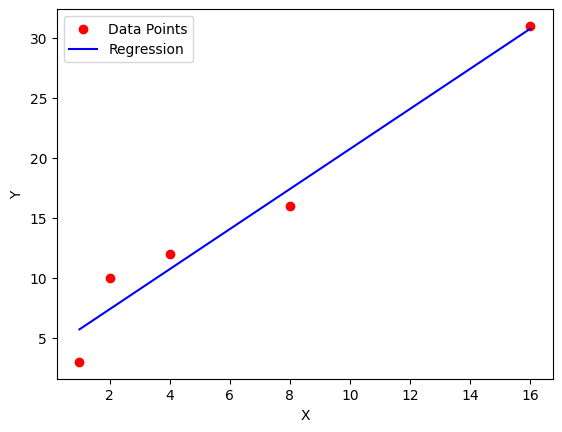

In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

#Define data
X = np.array([[1],[2],[4],[8],[16]])
Y = np.array([3, 10, 12, 16, 31])
#Conduct regression
model = LinearRegression()
model.fit(X, Y)
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope: {slope}, Intercept: {intercept}")
#Extrapolate values
Y_Pred = model.predict(X)
r2 = r2_score(Y, Y_Pred)
mse = mean_squared_error(Y, Y_Pred)
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
#Find RSS
rss = np.sum((Y-Y_Pred)**2)
print(f"Residual Sum of Squares (RSS): {rss}")
#Plot data points and line
plt.scatter(X, Y, color = 'red', label = 'Data Points')
plt.plot(X, Y_Pred, color = 'blue', label = 'Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()